In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt

In [0]:
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [0]:
from xgboost              import XGBClassifier
from sklearn.ensemble     import ExtraTreesClassifier
from sklearn.tree         import ExtraTreeClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm             import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TextAnalytics/features_binary_classification.csv')

In [6]:
dataset.head()

,ArticleId:SentenceNumber,Happiness,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral,bias_count,assertives_count,factives_count,hedges_count,implicatives_count,report_verbs_count,positive_op_count,negative_op_count,wneg_count,wpos_count,wneu_count,sneg_count,spos_count,sneu_count,TTR,vad_neg,vad_neu,vad_pos,FKE,SMOG,stop,wordlen,WC,quotes,Exclaim,AllPunc,allcaps,...,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,avg_word_sim,avg_sent_sim,x_y,x_2,y_2,Propaganda
0,111111112:5,5.258182,0.0,0.0,0.0,0.000000,0.076923,0.0,0.0,0.0,0.0,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.167,0.833,0.000,17.6067,12.486833,0.153846,6.818182,13,0.000000,0.0,7.692308,0.000000,...,0.000000,0.0,15.384615,0.000000,0.0,0.000000,0.0,0.0,7.692308,7.692308,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,7.692308,0.000000,0.000000,7.692308,0.000000,0.000000,0.0,0.000000,0.0,7.692308,0.000000,0.0,0.0,0.0,0.131630,0.771643,0.101572,0.017327,0.595432,yes
1,111111112:9,5.354286,0.0,0.0,0.0,0.041667,0.000000,0.0,0.0,0.0,0.0,0.0,0.041667,0.083333,0.0,0.0,0.041667,0.0,0.000000,0.041667,0.0,0.0,0.083333,0.041667,0.0,0.000000,0.0,0.952381,0.099,0.782,0.119,11.2264,16.416408,0.375000,5.933333,24,8.333333,0.0,4.166667,0.041667,...,0.000000,0.0,8.333333,0.000000,0.0,4.166667,0.0,0.0,0.000000,0.000000,4.166667,4.166667,0.0,4.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.166667,0.000000,0.0,4.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.411146,0.771643,0.317258,0.169041,0.595432,no
2,111111112:13,5.020000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000,1.000,0.000,1.3133,8.477226,0.000000,5.000000,3,0.000000,0.0,33.333333,0.000000,...,0.000000,0.0,33.333333,33.333333,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.480583,0.771643,0.370838,0.230960,0.595432,no
3,111111112:17,5.049630,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.131579,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.970588,0.118,0.882,0.000,13.2876,8.477226,0.263158,4.642857,38,0.000000,0.0,10.526316,0.026316,...,2.631579,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.631579,2.631579,0.0,0.0,0.0,34.210526,2.631579,13.157895,18.421053,0.000000,2.631579,0.0,0.000000,0.0,0.000000,2.631579,0.0,0.0,0.0,0.924318,0.771643,0.713243,0.854363,0.595432,no
4,111111112:19,5.317241,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.022222,0.0,0.0,0.000000,0.0,0.022222,0.022222,0.0,0.0,0.022222,0.000000,0.0,0.022222,0.0,0.868421,0.148,0.785,0.067,15.3533,10.745967,0.355556,4.724138,45,2.222222,0.0,11.111111,0.044444,...,0.000000,0.0,6.666667,0.000000,0.0,0.000000,0.0,0.0,4.444444,2.222222,0.000000,2.222222,0.0,2.222222,0.0,0.000000,0.000000,0.0,0.0,0.0,4.444444,2.222222,2.222222,0.000000,0.000000,0.000000,0.0,4.444444,0.0,0.000000,0.000000,0.0,0.0,0.0,2.628984,0.771643,2.028637,6.911558,0.595432,no


In [7]:
y = dataset['Propaganda']
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: Propaganda, dtype: object

In [8]:
x = dataset.drop(['ArticleId:SentenceNumber','Propaganda'], axis = 1)
x.head()

,Happiness,HarmVirtue,HarmVice,FairnessVirtue,FairnessVice,IngroupVirtue,IngroupVice,AuthorityVirtue,AuthorityVice,PurityVirtue,PurityVice,MoralityGeneral,bias_count,assertives_count,factives_count,hedges_count,implicatives_count,report_verbs_count,positive_op_count,negative_op_count,wneg_count,wpos_count,wneu_count,sneg_count,spos_count,sneu_count,TTR,vad_neg,vad_neu,vad_pos,FKE,SMOG,stop,wordlen,WC,quotes,Exclaim,AllPunc,allcaps,CC,...,anx,anger,sad,cogmech,insight,cause,discrep,tentat,certain,inhib,incl,excl,percept,see,hear,feel,bio,body,health,sexual,ingest,relativ,motion,space,time,work,achieve,leisure,home,money,relig,death,assent,nonfl,filler,avg_word_sim,avg_sent_sim,x_y,x_2,y_2
0,5.258182,0.0,0.0,0.0,0.000000,0.076923,0.0,0.0,0.0,0.0,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.167,0.833,0.000,17.6067,12.486833,0.153846,6.818182,13,0.000000,0.0,7.692308,0.000000,0.083333,...,0.0,0.000000,0.0,15.384615,0.000000,0.0,0.000000,0.0,0.0,7.692308,7.692308,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,7.692308,0.000000,0.000000,7.692308,0.000000,0.000000,0.0,0.000000,0.0,7.692308,0.000000,0.0,0.0,0.0,0.131630,0.771643,0.101572,0.017327,0.595432
1,5.354286,0.0,0.0,0.0,0.041667,0.000000,0.0,0.0,0.0,0.0,0.0,0.041667,0.083333,0.0,0.0,0.041667,0.0,0.000000,0.041667,0.0,0.0,0.083333,0.041667,0.0,0.000000,0.0,0.952381,0.099,0.782,0.119,11.2264,16.416408,0.375000,5.933333,24,8.333333,0.0,4.166667,0.041667,0.000000,...,0.0,0.000000,0.0,8.333333,0.000000,0.0,4.166667,0.0,0.0,0.000000,0.000000,4.166667,4.166667,0.0,4.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.166667,0.000000,0.0,4.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.411146,0.771643,0.317258,0.169041,0.595432
2,5.020000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000,1.000,0.000,1.3133,8.477226,0.000000,5.000000,3,0.000000,0.0,33.333333,0.000000,0.000000,...,0.0,0.000000,0.0,33.333333,33.333333,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.480583,0.771643,0.370838,0.230960,0.595432
3,5.049630,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.131579,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.970588,0.118,0.882,0.000,13.2876,8.477226,0.263158,4.642857,38,0.000000,0.0,10.526316,0.026316,0.000000,...,0.0,2.631579,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.631579,2.631579,0.0,0.0,0.0,34.210526,2.631579,13.157895,18.421053,0.000000,2.631579,0.0,0.000000,0.0,0.000000,2.631579,0.0,0.0,0.0,0.924318,0.771643,0.713243,0.854363,0.595432
4,5.317241,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.022222,0.0,0.0,0.000000,0.0,0.022222,0.022222,0.0,0.0,0.022222,0.000000,0.0,0.022222,0.0,0.868421,0.148,0.785,0.067,15.3533,10.745967,0.355556,4.724138,45,2.222222,0.0,11.111111,0.044444,0.026316,...,0.0,0.000000,0.0,6.666667,0.000000,0.0,0.000000,0.0,0.0,4.444444,2.222222,0.000000,2.222222,0.0,2.222222,0.0,0.000000,0.000000,0.0,0.0,0.0,4.444444,2.222222,2.222222,0.000000,0.000000,0.000000,0.0,4.444444,0.0,0.000000,0.000000,0.0,0.0,0.0,2.628984,0.771643,2.028637,6.911558,0.595432


In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2,random_state = 42, stratify = y)

In [0]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6293, 144)
(1574, 144)
(6293,)
(1574,)


In [0]:
parameters = {'n_estimators': [100,160,200,500, 700, 900, 1000, 1200, 1500, 1600]}
clf_rf_test = RandomForestClassifier(n_jobs=-1, random_state=0)
rf = GridSearchCV(clf_rf_test, parameters, n_jobs=-1)

In [37]:
rf.fit(x, y)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                  

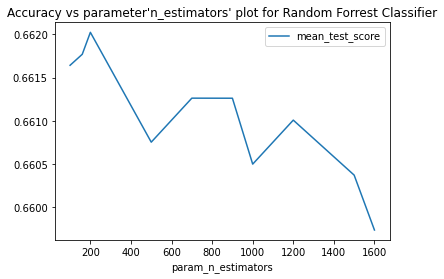

In [38]:
results = pd.DataFrame(rf.cv_results_)
results.sort_values('mean_test_score', ascending = False)
results.plot('param_n_estimators','mean_test_score', title="Accuracy vs parameter'n_estimators' plot for Random Forrest Classifier")

In [0]:
labels = ['yes', 'no']

In [0]:
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

In [0]:
def computeScores(clf, X_train, y_train, X_test, y_test):   
    # __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        # if not hasattr(clf, 'feature_importances_'):
        clf.fit(X_train, y_train)
        # if not hasattr(clf, 'feature_importances_'):
        #   raise AttributeError("{} does not have feature_importances_ attribute".format(clf.__class__.__name__))
                
    except Exception as e:
        print(e)

    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    f1score = f1_score(y_test, y_pred, pos_label='yes')

    print("Confusion_matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
  
    print(clf.__class__.__name__, " Classification report:")
    print(metrics.classification_report(y_test, y_pred, digits=3))
    cm = metrics.confusion_matrix(y_test, y_pred)
    cmdf = cm2df(cm, labels)
    plt.figure(figsize=(7,7))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(cmdf, cmap=cmap, annot=True, fmt='d')
    plt.xlabel('Predicted',size =2)
    plt.ylabel('Actual', size =2)
    plt.title(clf.__class__.__name__)
    plt.show()

    print (clf.__class__.__name__)
    print ("Accuracy: ", accuracy)
    print("F1 Score: ", f1score)
    print("-------------------------------------------------------------")
        
    return accuracy, f1score

In [0]:
def plot_feature_importances(clf, X_train, y_train=None, top_n=10, figsize=(12,6), print_table=False, title="Feature Importances"):
   
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.bar(title=title, figsize=figsize)
    plt.ylabel('Feature Importance Score')
    s = "/content/drive/My Drive/Colab Notebooks/TextAnalytics/binary results/" + clf.__class__.__name__
    plt.savefig(s)
    
    if print_table:
        from IPython.display import display
        print(clf.__class__.__name__, " top {} features".format(top_n))
        print("in descending order of importance")
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

In [0]:
# LogisticRegression(class_weight='balanced',n_jobs= -1),BaggingClassifier(),  

In [0]:
clfs = [XGBClassifier(),      LGBMClassifier(), 
        ExtraTreesClassifier(),       ExtraTreeClassifier(),
                DecisionTreeClassifier(),
        GradientBoostingClassifier(), 
        AdaBoostClassifier(),         RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)]

In [0]:
from sklearn import metrics

Confusion_matrix:
[[562 225]
 [232 555]]
XGBClassifier  Classification report:
              precision    recall  f1-score   support

          no      0.708     0.714     0.711       787
         yes      0.712     0.705     0.708       787

    accuracy                          0.710      1574
   macro avg      0.710     0.710     0.710      1574
weighted avg      0.710     0.710     0.710      1574



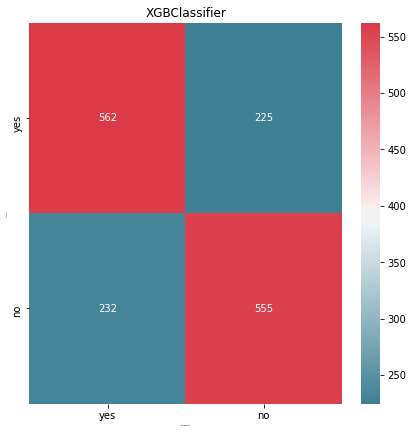

XGBClassifier
Accuracy:  0.7096569250317663
F1 Score:  0.7083599234205488
-------------------------------------------------------------
Confusion_matrix:
[[609 178]
 [187 600]]
LGBMClassifier  Classification report:
              precision    recall  f1-score   support

          no      0.765     0.774     0.769       787
         yes      0.771     0.762     0.767       787

    accuracy                          0.768      1574
   macro avg      0.768     0.768     0.768      1574
weighted avg      0.768     0.768     0.768      1574



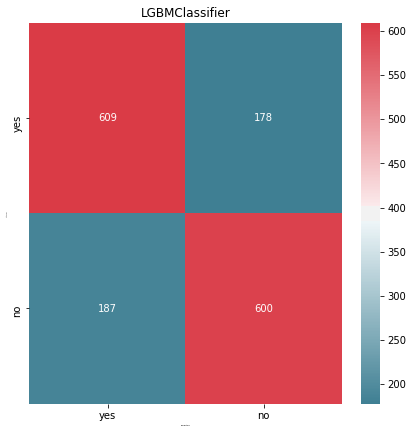

LGBMClassifier
Accuracy:  0.7681067344345617
F1 Score:  0.7667731629392971
-------------------------------------------------------------
Confusion_matrix:
[[532 255]
 [214 573]]
ExtraTreesClassifier  Classification report:
              precision    recall  f1-score   support

          no      0.713     0.676     0.694       787
         yes      0.692     0.728     0.710       787

    accuracy                          0.702      1574
   macro avg      0.703     0.702     0.702      1574
weighted avg      0.703     0.702     0.702      1574



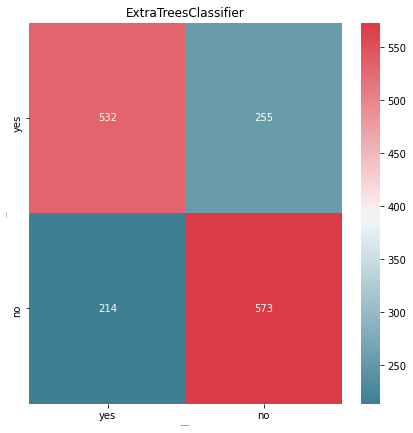

ExtraTreesClassifier
Accuracy:  0.7020330368487929
F1 Score:  0.7095975232198143
-------------------------------------------------------------
Confusion_matrix:
[[459 328]
 [336 451]]
ExtraTreeClassifier  Classification report:
              precision    recall  f1-score   support

          no      0.577     0.583     0.580       787
         yes      0.579     0.573     0.576       787

    accuracy                          0.578      1574
   macro avg      0.578     0.578     0.578      1574
weighted avg      0.578     0.578     0.578      1574



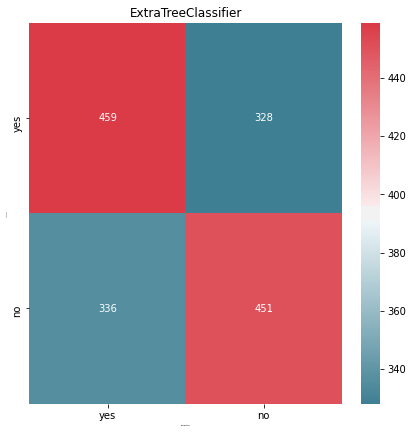

ExtraTreeClassifier
Accuracy:  0.5781448538754765
F1 Score:  0.5759897828863347
-------------------------------------------------------------
Confusion_matrix:
[[502 285]
 [297 490]]
DecisionTreeClassifier  Classification report:
              precision    recall  f1-score   support

          no      0.628     0.638     0.633       787
         yes      0.632     0.623     0.627       787

    accuracy                          0.630      1574
   macro avg      0.630     0.630     0.630      1574
weighted avg      0.630     0.630     0.630      1574



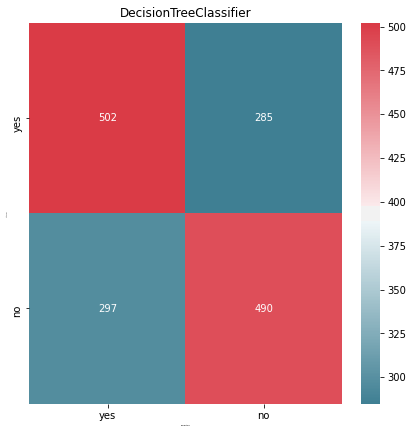

DecisionTreeClassifier
Accuracy:  0.6302414231257941
F1 Score:  0.6274007682458386
-------------------------------------------------------------
Confusion_matrix:
[[570 217]
 [223 564]]
GradientBoostingClassifier  Classification report:
              precision    recall  f1-score   support

          no      0.719     0.724     0.722       787
         yes      0.722     0.717     0.719       787

    accuracy                          0.720      1574
   macro avg      0.720     0.720     0.720      1574
weighted avg      0.720     0.720     0.720      1574



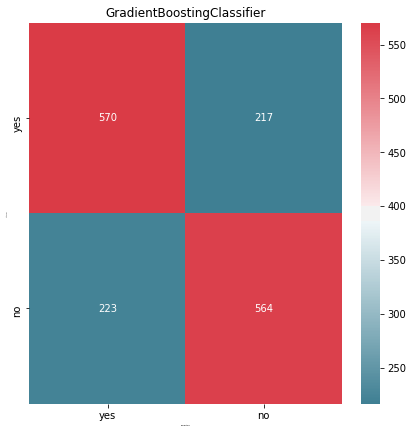

GradientBoostingClassifier
Accuracy:  0.7204574332909784
F1 Score:  0.7193877551020408
-------------------------------------------------------------
Confusion_matrix:
[[551 236]
 [223 564]]
AdaBoostClassifier  Classification report:
              precision    recall  f1-score   support

          no      0.712     0.700     0.706       787
         yes      0.705     0.717     0.711       787

    accuracy                          0.708      1574
   macro avg      0.708     0.708     0.708      1574
weighted avg      0.708     0.708     0.708      1574



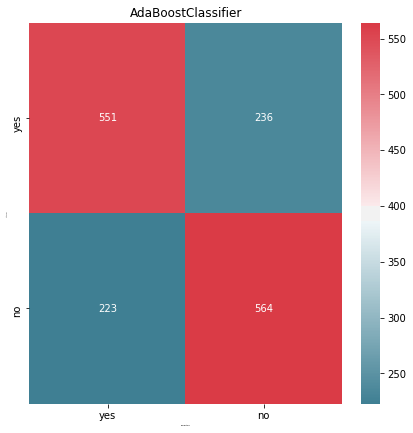

AdaBoostClassifier
Accuracy:  0.7083862770012707
F1 Score:  0.7107750472589792
-------------------------------------------------------------
Confusion_matrix:
[[540 247]
 [198 589]]
RandomForestClassifier  Classification report:
              precision    recall  f1-score   support

          no      0.732     0.686     0.708       787
         yes      0.705     0.748     0.726       787

    accuracy                          0.717      1574
   macro avg      0.718     0.717     0.717      1574
weighted avg      0.718     0.717     0.717      1574



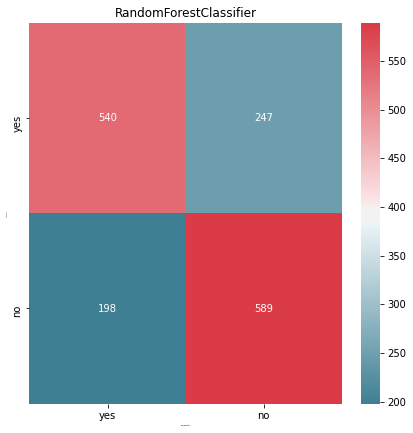

RandomForestClassifier
Accuracy:  0.7172808132147395
F1 Score:  0.7258163894023415
-------------------------------------------------------------


In [36]:
accuracies =[]
f1scores=[]
for clf in clfs:
    try:
      accuracy, f1score = computeScores(clf, x_train, y_train, x_test, y_test)
      accuracies.append(accuracy)
      f1scores.append(f1score)
    except AttributeError as e:
      print(e)

In [0]:
clf_names=[]
for clf in clfs:
  clf_names.append(clf.__class__.__name__)

In [0]:
results = {}
results['Classifier'] = clf_names
results['Accuracy'] = accuracies
results['F1 Scores'] = f1scores

In [21]:
df_result = pd.DataFrame.from_dict(results)
df_result.head()

,Classifier,Accuracy,F1 Scores
0,XGBClassifier,0.709657,0.708360
1,LGBMClassifier,0.768107,0.766773
2,ExtraTreesClassifier,0.695680,0.705231
3,ExtraTreeClassifier,0.589581,0.588535
4,DecisionTreeClassifier,0.635324,0.636709


In [22]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


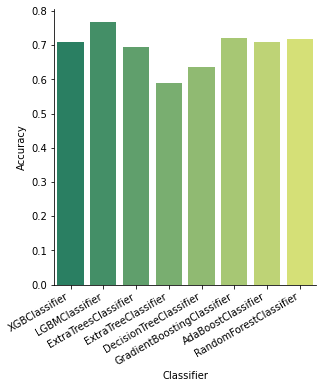

In [28]:
g = sns.catplot(x="Classifier", y="Accuracy",kind='bar',data=df_result,palette='summer')

g.fig.autofmt_xdate()

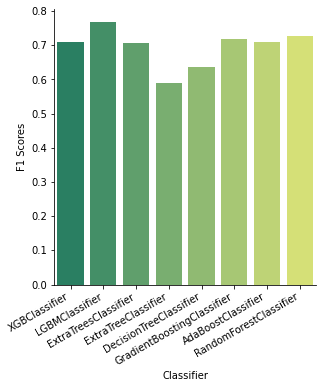

In [29]:
g = sns.catplot(x="Classifier", y="F1 Scores",kind='bar',data=df_result,palette='summer')

g.fig.autofmt_xdate()

XGBClassifier  top 10 features
in descending order of importance


,importance
feature,
negative_op_count,0.085511
sneg_count,0.042050
avg_word_sim,0.041694
vad_neu,0.033739
x_y,0.029883
present,0.027145
avg_sent_sim,0.025264
spos_count,0.024409
SMOG,0.022010


LGBMClassifier  top 10 features
in descending order of importance


,importance
feature,
avg_sent_sim,497
avg_word_sim,117
FKE,75
Happiness,68
x_y,67
wordlen,65
VBD,56
JJ,56
bias_count,50


ExtraTreesClassifier  top 10 features
in descending order of importance


,importance
feature,
avg_word_sim,0.023561
x_y,0.021879
avg_sent_sim,0.018982
y_2,0.018675
vad_neg,0.017007
vad_neu,0.016985
SMOG,0.016861
x_2,0.015453
WC,0.015289


ExtraTreeClassifier  top 10 features
in descending order of importance


,importance
feature,
WC,0.033103
avg_word_sim,0.028224
x_y,0.022713
y_2,0.021034
SMOG,0.019493
x_2,0.018002
negative_op_count,0.016821
TTR,0.016584
avg_sent_sim,0.016434


DecisionTreeClassifier  top 10 features
in descending order of importance


,importance
feature,
negative_op_count,0.080343
y_2,0.056420
avg_sent_sim,0.046990
x_y,0.041337
avg_word_sim,0.038339
x_2,0.036719
FKE,0.034125
vad_neu,0.022612
Happiness,0.021328


GradientBoostingClassifier  top 10 features
in descending order of importance


,importance
feature,
avg_sent_sim,0.137570
y_2,0.126994
avg_word_sim,0.103143
negative_op_count,0.089139
x_2,0.064909
vad_neu,0.064594
x_y,0.046431
sneg_count,0.039040
FKE,0.032633


AdaBoostClassifier  top 10 features
in descending order of importance


,importance
feature,
y_2,0.16
avg_sent_sim,0.12
x_2,0.06
excl,0.04
negative_op_count,0.04
positive_op_count,0.04
CD,0.04
FKE,0.04
preps,0.02


RandomForestClassifier  top 10 features
in descending order of importance


,importance
feature,
avg_word_sim,0.038906
y_2,0.038361
avg_sent_sim,0.038328
x_2,0.037543
x_y,0.036753
vad_neu,0.023181
FKE,0.022651
negative_op_count,0.021305
vad_neg,0.017512


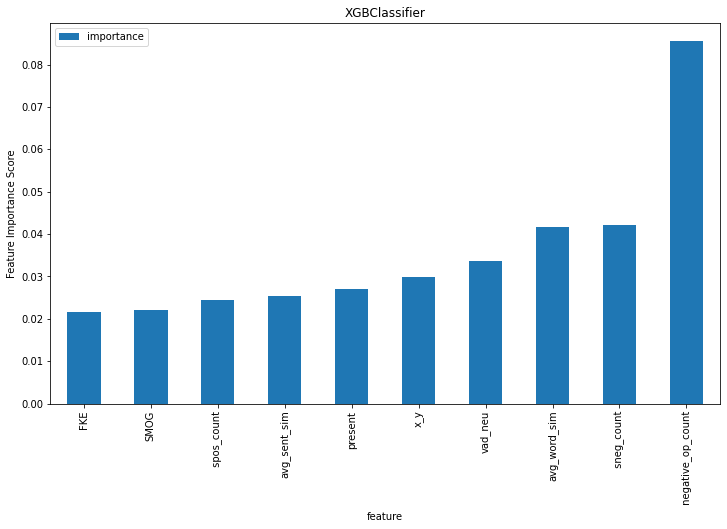

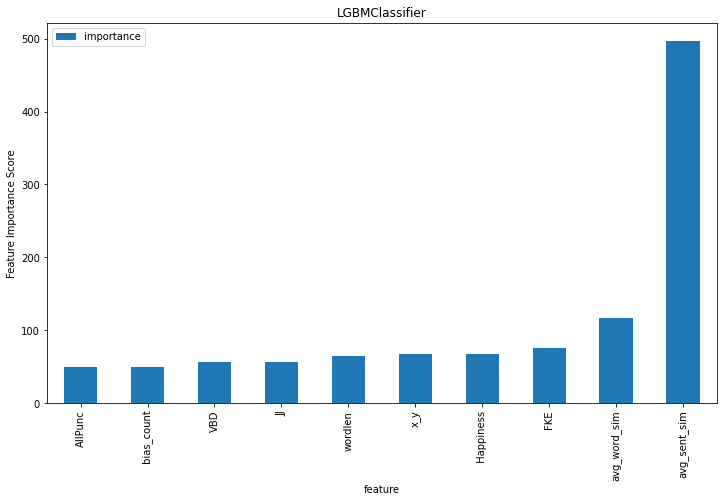

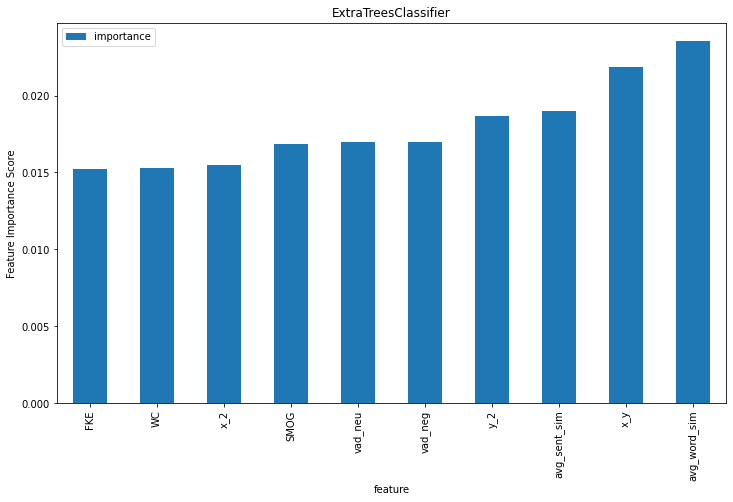

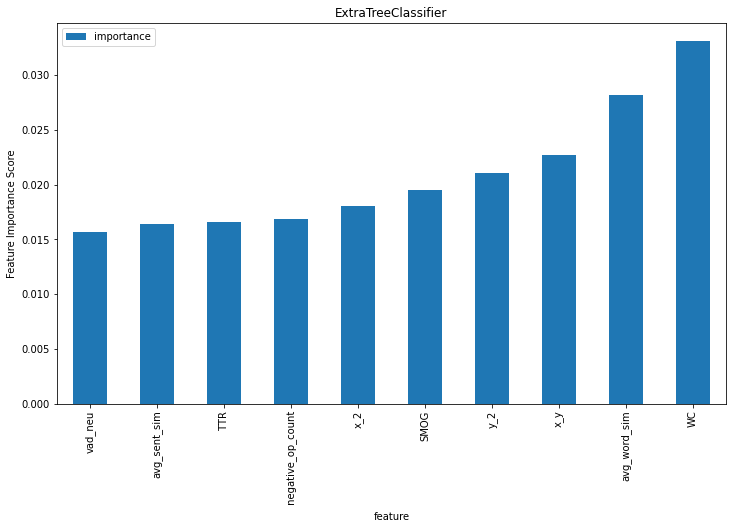

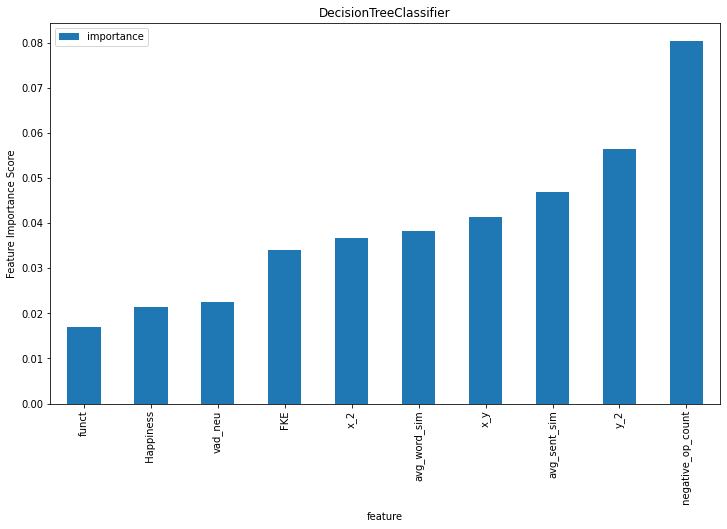

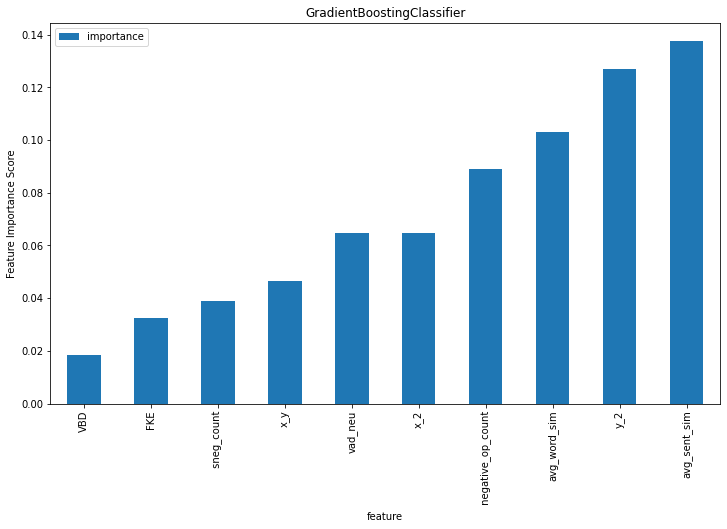

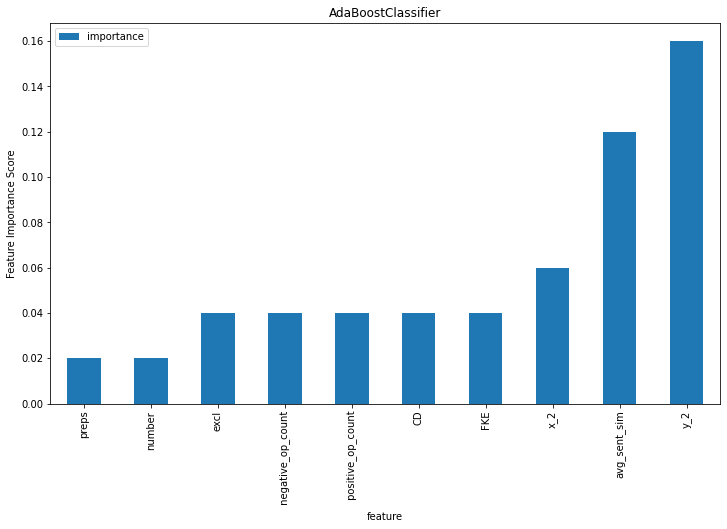

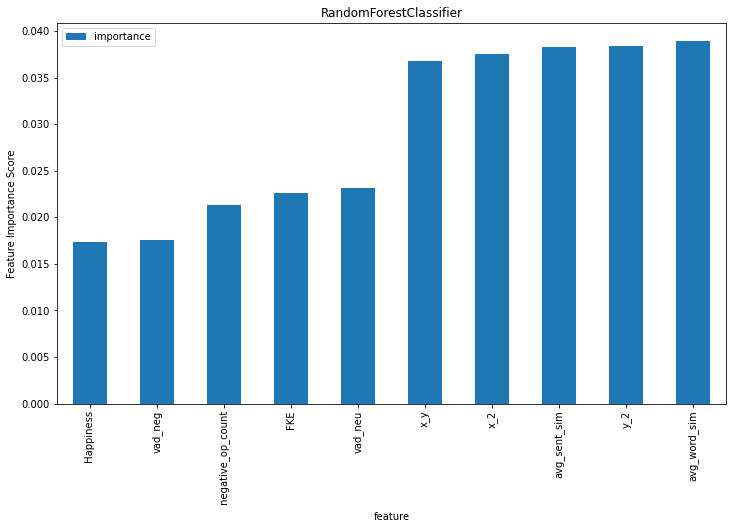

In [25]:
for clf in clfs:
    try:
      _ = plot_feature_importances(clf, x_train, y_train, top_n= 10,figsize=(12,7),print_table=True, title=clf.__class__.__name__)
      accuracies.append(accuracy)
      f1scores.append(f1score)
    except AttributeError as e:
      print(e)

In [0]:
# ,' Happiness', 'x_y', 'wordlen'

In [0]:
x_updated = x[['avg_sent_sim', 'avg_word_sim', 'FKE', ' Happiness']]

In [40]:
x_updated.head()

,avg_sent_sim,avg_word_sim,FKE,Happiness
0,0.771643,0.131630,17.6067,5.258182
1,0.771643,0.411146,11.2264,5.354286
2,0.771643,0.480583,1.3133,5.020000
3,0.771643,0.924318,13.2876,5.049630
4,0.771643,2.628984,15.3533,5.317241


In [0]:
x_train_updated, x_test_updated, y_train_updated, y_test_updated = model_selection.train_test_split(x_updated, y, test_size=0.2,random_state = 42, stratify = y)

In [0]:
clf_updated = LGBMClassifier()

In [43]:
clf_updated.fit(x_train_updated, y_train_updated)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred_updated = clf_updated.predict(x_test_updated)

In [0]:
score_updated = clf_updated.score(x_test_updated, y_test_updated)

In [46]:
score_updated

0.7878017789072427

In [0]:
fiscore_updated = f1_score(y_test_updated, y_pred_updated, pos_label='yes')

In [48]:
fiscore_updated

0.7799736495388669

In [0]:
from sklearn import metrics